<a href="https://colab.research.google.com/github/TechnoRahmon/Consumer_Reviews_of_Amazon-Products/blob/main/LSTM_Consumer_Reviews_of_Amazon_Products.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import math
import warnings #But we need to hide these warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings("ignore",category=UserWarning)
sns.set_style("whitegrid")
%matplotlib inline
np.random.seed(7)

In [2]:
dataset_base_url = '/content/drive/MyDrive/DataCamp/final-project/1429_1.csv'
font_base_url = '/content/drive/MyDrive/Work/devopro'

In [3]:
# Load the dataset into a Pandas DataFrame
df = pd.read_csv(dataset_base_url)
df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,True,NaN,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42


In [4]:
df.tail()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username
34655,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-09-18T00:00:00Z,NaN,2015-08-29T00:00:00Z,...,NaN,NaN,NaN,3.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,This is not appreciably faster than any other ...,Not appreciably faster than any other 1.8A cha...,NaN,NaN,Kris
34656,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-11-21T00:00:00Z,NaN,2015-09-02T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Amazon should include this charger with the Ki...,Should be included,NaN,NaN,Jonathan Stewart
34657,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-19T00:00:00Z,NaN,2015-09-04T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,Love my Kindle Fire but I am really disappoint...,Disappointing Charger,NaN,NaN,J Lawson
34658,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-10-31T00:00:00Z,NaN,2015-09-01T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,I was surprised to find it did not come with a...,Not worth the money,NaN,NaN,Just the Buyer
34659,AVpfiBlyLJeJML43-4Tp,NaN,B006GWO5WK,Amazon,"Computers/Tablets & Networking,Tablet & eBook ...",newamazonkindlefirehd9wpowerfastadaptercharger...,"Amazon Digital Services, Inc",2012-12-23T00:00:00Z,NaN,2015-11-01T00:00:00Z,...,NaN,NaN,NaN,1.0,http://www.amazon.com/Amazon-PowerFast-Adapter...,to spite the fact that i have nothing but good...,as with everyone else,NaN,NaN,sandi


In [5]:
df.describe()

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince
count,1.0,34131.000000,34627.000000,0.0,0.0
mean,111372787.0,0.630248,4.584573,NaN,NaN
std,NaN,13.215775,0.735653,NaN,NaN
min,111372787.0,0.000000,1.000000,NaN,NaN
25%,111372787.0,0.000000,4.000000,NaN,NaN
50%,111372787.0,0.000000,5.000000,NaN,NaN
75%,111372787.0,0.000000,5.000000,NaN,NaN
max,111372787.0,814.000000,5.000000,NaN,NaN


# New Section

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34660 entries, 0 to 34659
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    34660 non-null  object 
 1   name                  27900 non-null  object 
 2   asins                 34658 non-null  object 
 3   brand                 34660 non-null  object 
 4   categories            34660 non-null  object 
 5   keys                  34660 non-null  object 
 6   manufacturer          34660 non-null  object 
 7   reviews.date          34621 non-null  object 
 8   reviews.dateAdded     24039 non-null  object 
 9   reviews.dateSeen      34660 non-null  object 
 10  reviews.didPurchase   1 non-null      object 
 11  reviews.doRecommend   34066 non-null  object 
 12  reviews.id            1 non-null      float64
 13  reviews.numHelpful    34131 non-null  float64
 14  reviews.rating        34627 non-null  float64
 15  reviews.sourceURLs 

In [7]:
df["asins"].unique()

array(['B01AHB9CN2', 'B00VINDBJK', 'B005PB2T0S', 'B002Y27P3M',
       'B01AHB9CYG', 'B01AHB9C1E', 'B01J2G4VBG', 'B00ZV9PXP2',
       'B0083Q04TA', 'B018Y229OU', 'B00REQKWGA', 'B00IOYAM4I',
       'B018T075DC', nan, 'B00DU15MU4', 'B018Y225IA', 'B005PB2T2Q',
       'B018Y23MNM', 'B00OQVZDJM', 'B00IOY8XWQ', 'B00LO29KXQ',
       'B00QJDU3KY', 'B018Y22C2Y', 'B01BFIBRIE', 'B01J4ORNHU',
       'B018SZT3BK', 'B00UH4D8G2', 'B018Y22BI4', 'B00TSUGXKE',
       'B00L9EPT8O,B01E6AO69U', 'B018Y23P7K', 'B00X4WHP5E', 'B00QFQRELG',
       'B00LW9XOJM', 'B00QL1ZN3G', 'B0189XYY0Q', 'B01BH83OOM',
       'B00BFJAHF8', 'B00U3FPN4U', 'B002Y27P6Y', 'B006GWO5NE',
       'B006GWO5WK'], dtype=object)

In [8]:
asins_unique = len(df["asins"].unique())
print(str(asins_unique))

42


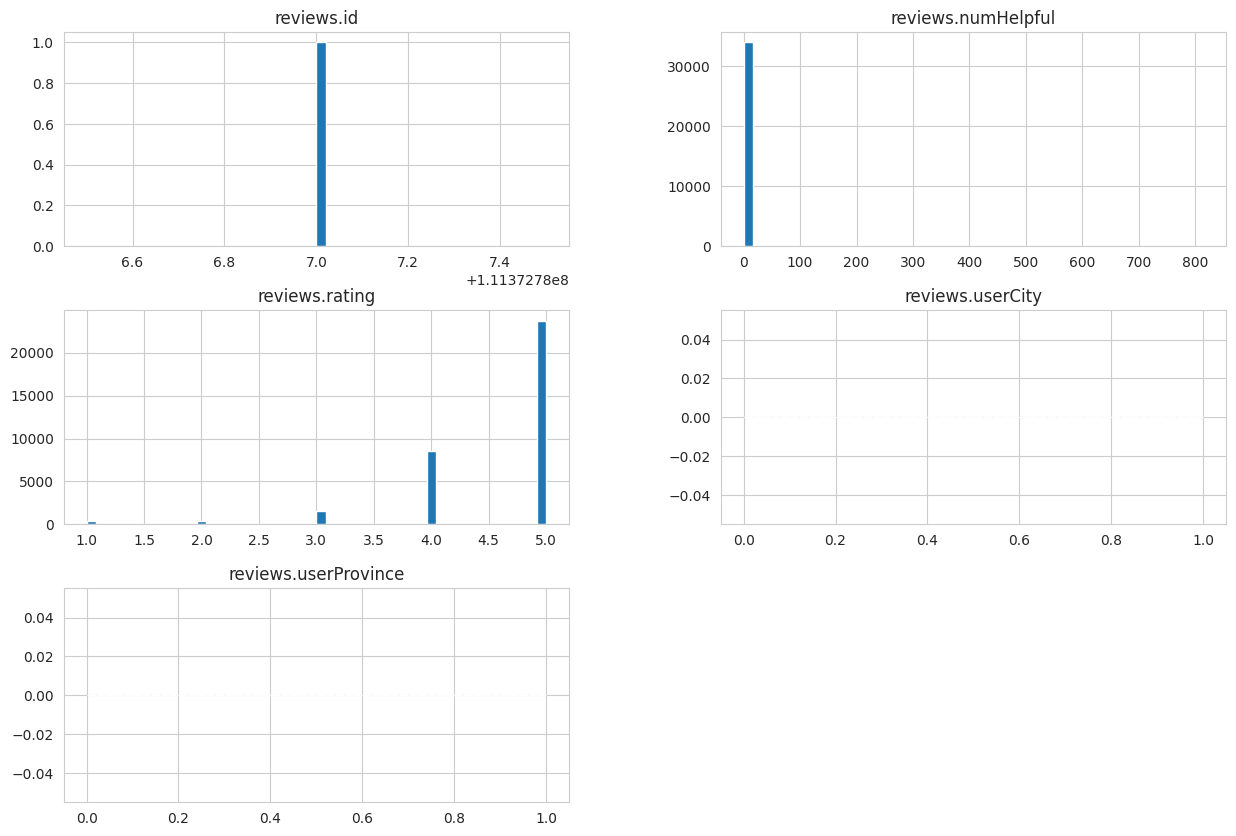

In [9]:
df.hist(bins=50, figsize=(15,10))
plt.show()

Text(0.5, 0, 'Rating Count')

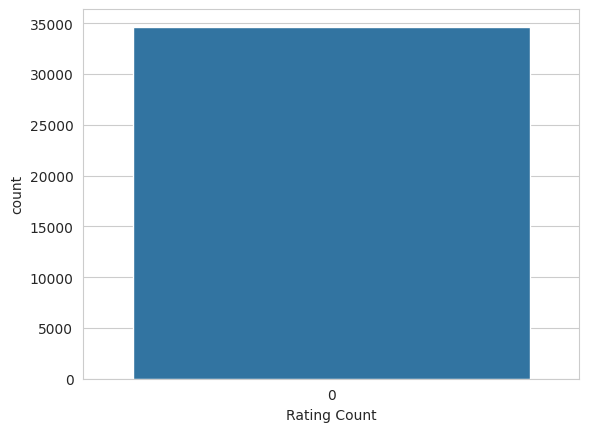

In [10]:
sns.countplot(df['reviews.rating'])
plt.xlabel('Rating Count')

Text(0.5, 0, 'Rating Count')

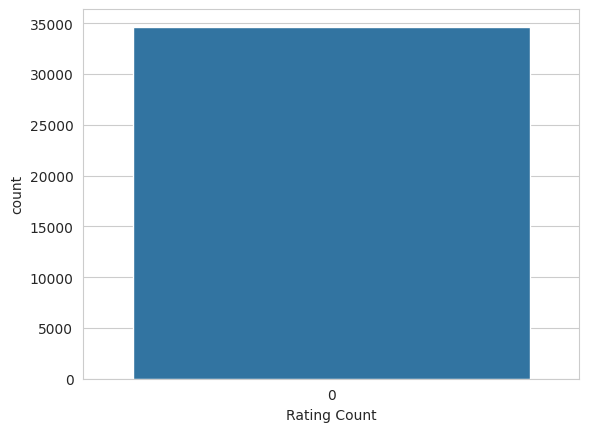

In [11]:
sns.countplot(df['reviews.numHelpful'])
plt.xlabel('Rating Count')

In [12]:
sentiment_score = {1: 0,
                   2: 0,
                   3: 1,
                   4: 2,
                   5: 2}
sentiment = {0: 'NEGATIVE',
             1: 'NEUTRAL',
             2: 'POSITIVE'}

In [13]:
df['sentiment_score'] = df['reviews.rating'].map(sentiment_score)
df['sentiment'] = df['sentiment_score'].map(sentiment_score)

df.head()

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sentiment_score,sentiment
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,2.0,0.0
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,2.0,0.0
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,2.0,0.0
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,2.0,0.0
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,2.0,0.0


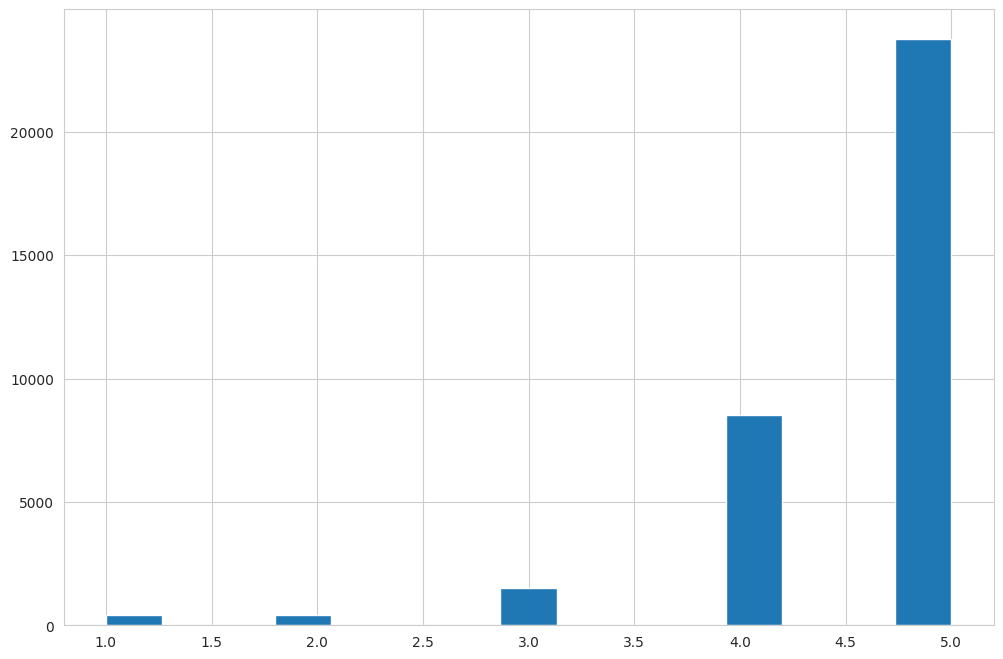

In [14]:
df['reviews.rating'].hist(bins=15, figsize=(12,8))
plt.show()

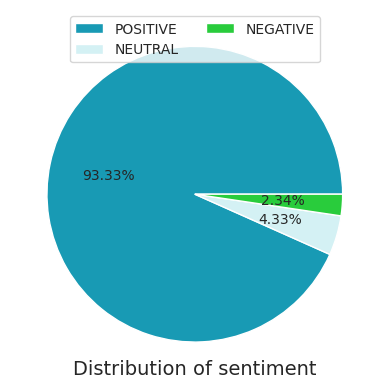

In [15]:
labels = ['POSITIVE','NEUTRAL', 'NEGATIVE']
colors = ['#189AB4', '#D4F1F4','#29cc3c']
plt.pie(df['sentiment_score'].value_counts(), autopct='%0.2f%%',colors=colors)

plt.title('Distribution of sentiment', size=14, y=-0.01)
plt.legend(labels, ncol=2, loc=9)
plt.show()

### Distribution Plots:

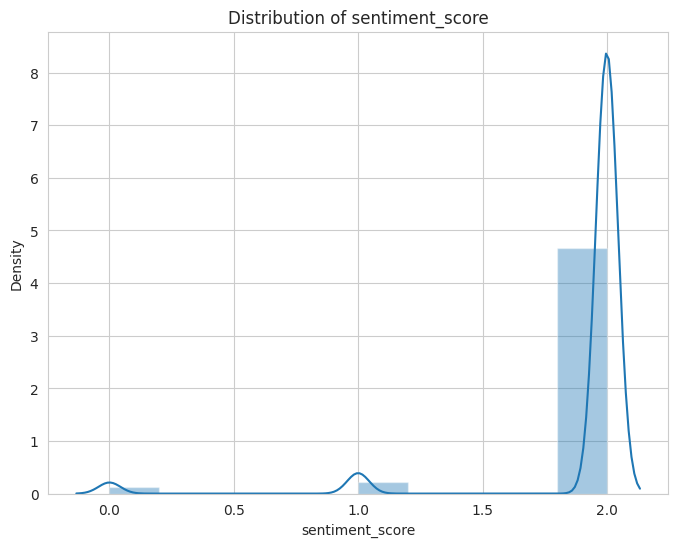

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.distplot(df['sentiment_score'], bins=10, kde=True)
plt.title('Distribution of sentiment_score')
plt.xlabel('sentiment_score')
plt.show()


In [17]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

def generate_wordcloud(all_words, feature):
    # Generate word cloud
    wordcloud = WordCloud(width = 1000, height = 500, font_path=f'{font_base_url}/DejaVuSans-Bold.ttf').generate(' '.join(all_words))

    # Plot word cloud
    plt.figure(figsize=(15,8))
    plt.imshow(wordcloud)
    plt.title(f"Most used words in {feature}", size=16)
    plt.axis("off")
    plt.show()

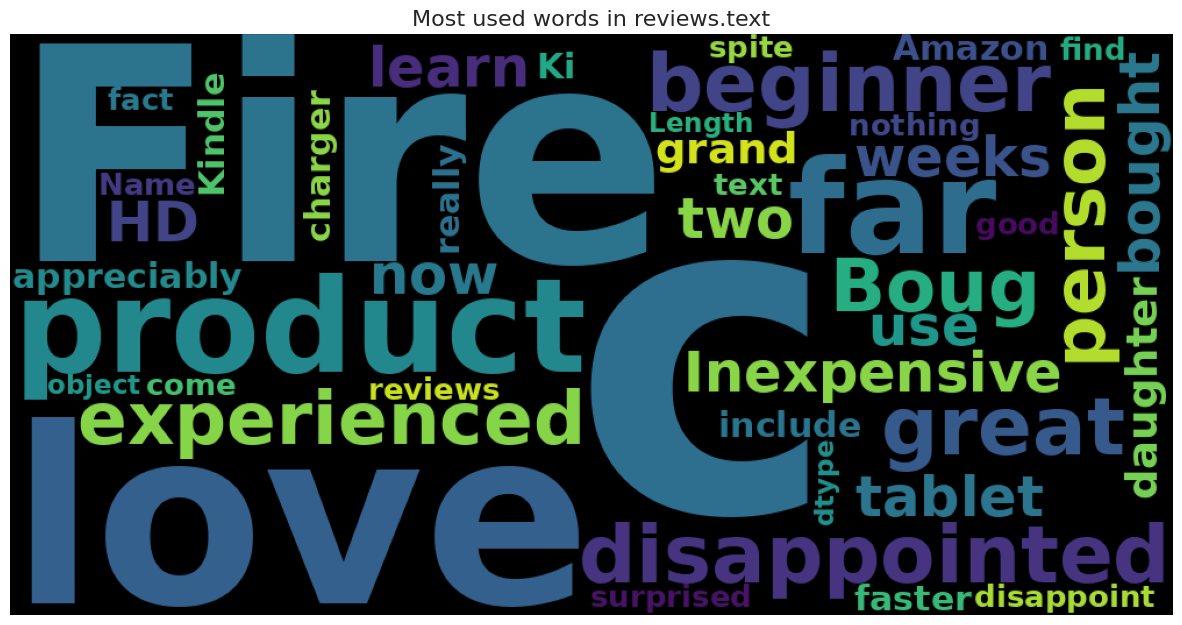

In [18]:
all_words =pd.Series(' '.join(str(df['reviews.text']).split()))

# plot word cloud
generate_wordcloud(all_words, 'reviews.text')

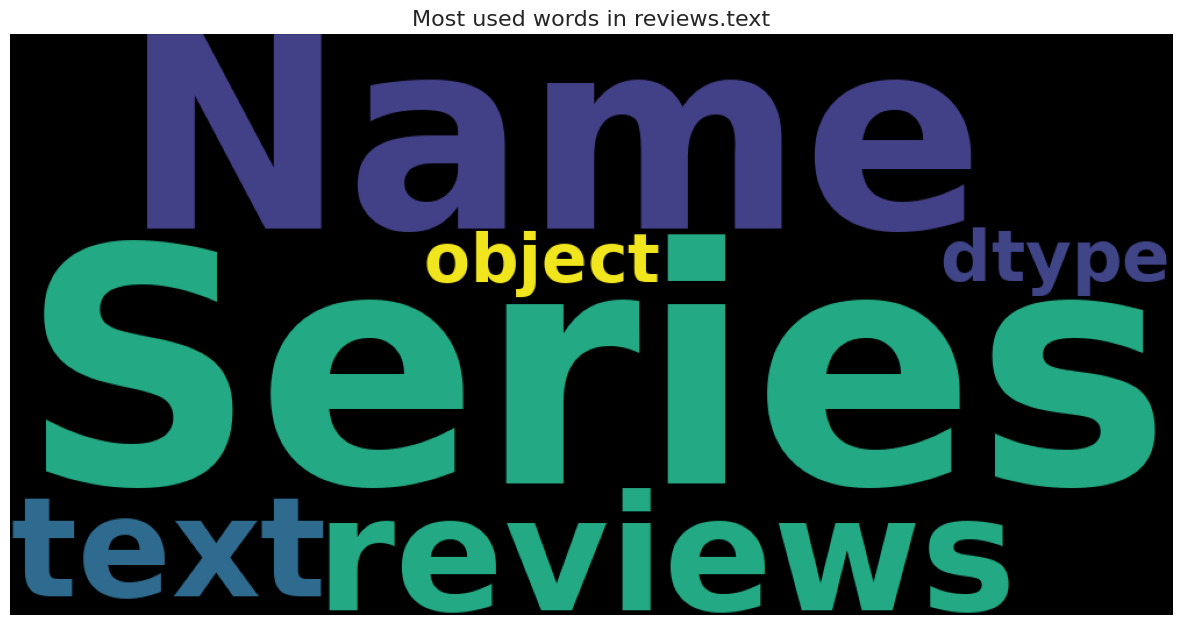

In [19]:
all_words =pd.Series(' '.join(str(df[df['sentiment_score'] == 5]['reviews.text']).split()))

# plot word cloud
generate_wordcloud(all_words, 'reviews.text')

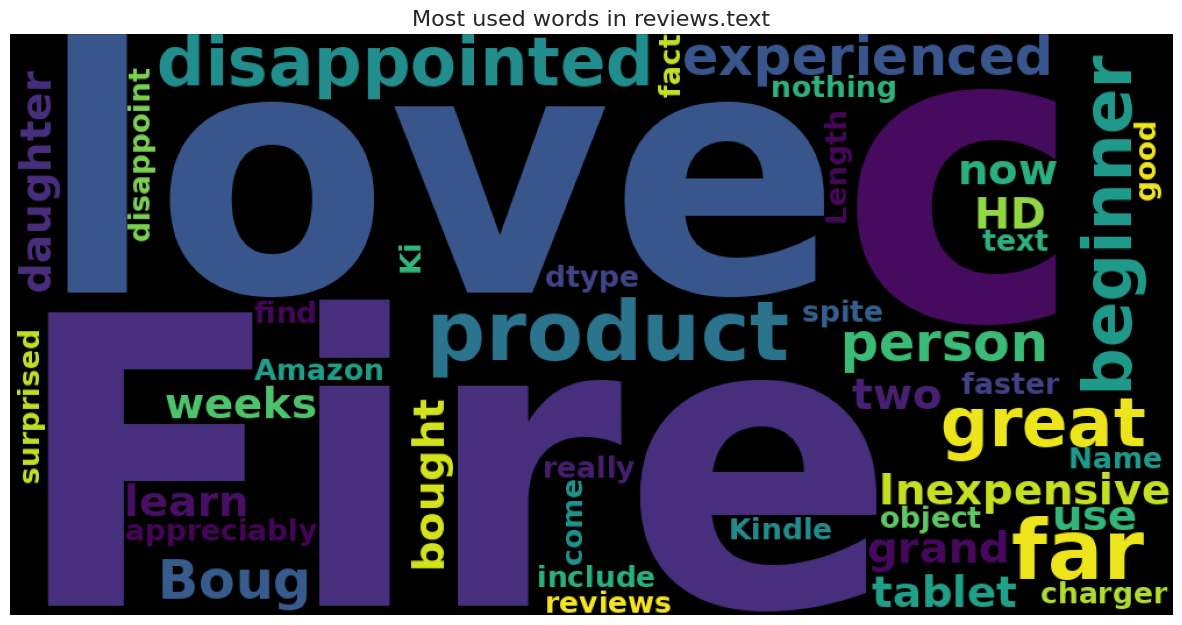

In [20]:
all_words =pd.Series(' '.join(str(df[df['sentiment_score'] < 4]['reviews.text']).split()))

# plot word cloud
generate_wordcloud(all_words, 'reviews.text')

In [21]:
print(f"in reviews.text there are : {df['reviews.text'].isnull().sum()} nan")

in reviews.text there are : 1 nan


In [22]:
def get_common_word(_df, feature):
  from collections import Counter
  reviews_without_null = _df[_df[feature].notnull()][feature]
  # Get the most common word in 'feature'
  words = pd.Series(' '.join(reviews_without_null).lower().split())
  return Counter(words).most_common(1)[0][0]

In [23]:
from collections import Counter
reviews_without_null = df[df['reviews.text'].notnull()]['reviews.text']
# Get the most common word in 'reviews.text'
words = pd.Series(' '.join(reviews_without_null).lower().split())
most_common_word = get_common_word(df, 'reviews.text')

# Replace NaN values in 'reviews.text'  with the most common word
df['reviews.text'] = df['reviews.text'].fillna(most_common_word)

In [24]:
print(f"in reviews.text there are : {df['reviews.text'].isnull().sum()} nan")

in reviews.text there are : 0 nan


In [25]:
from collections import Counter
import matplotlib.pyplot as plt
import numpy as np
def show_word_ferq(feature):
  # Get the top 10 most common words
  words = ' '.join(df[feature]).split()
  word_counts = Counter(words)
  top_10_words = word_counts.most_common(10)

  # Separate the words and their counts
  words, counts = zip(*top_10_words)

  # Create the bar plot
  fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16, 10), sharex=True)
  ax1.bar(words, counts)
  ax1.set_title(f"{feature} Word Frequency")

  ax2.bar(words, np.log10(counts))
  ax2.set_title(f"{feature} Word Frequency (Log10 Adjusted)")
  plt.show()

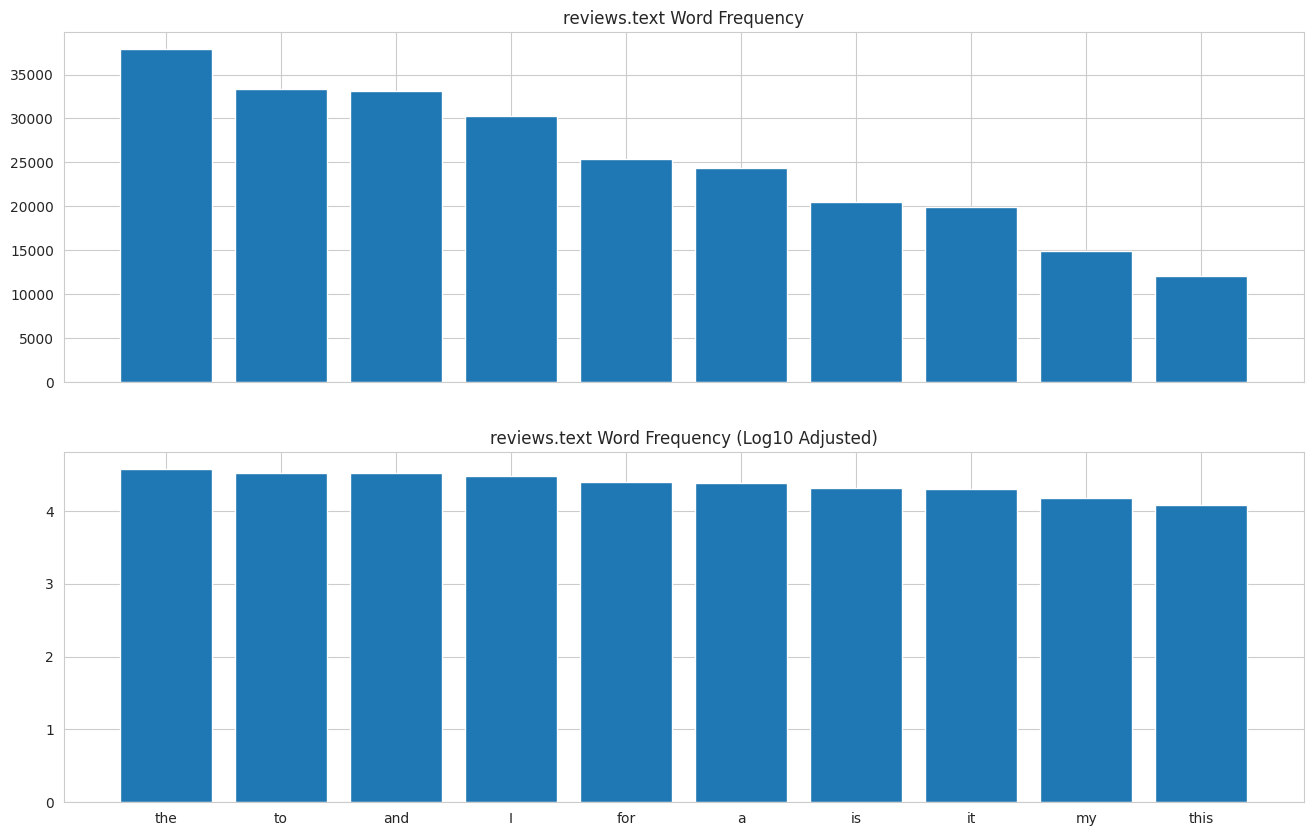

In [26]:
show_word_ferq('reviews.text')

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Assuming df is your DataFrame with 'reviews.text' and 'sentiment_score' columns
# Replace 'your_dataframe' with the actual name of your DataFrame
positive_reviews = df[df['sentiment_score'].isin([2])]  # Selecting positive reviews
positive_reviews.head()



,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sentiment_score,sentiment
0,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,This product so far has not disappointed. My c...,Kindle,NaN,NaN,Adapter,2.0,0.0
1,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,great for beginner or experienced person. Boug...,very fast,NaN,NaN,truman,2.0,0.0
2,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,Inexpensive tablet for him to use and learn on...,Beginner tablet for our 9 year old son.,NaN,NaN,DaveZ,2.0,0.0
3,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-13T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,4.0,http://reviews.bestbuy.com/3545/5620406/review...,I've had my Fire HD 8 two weeks now and I love...,Good!!!,NaN,NaN,Shacks,2.0,0.0
4,AVqkIhwDv8e3D1O-lebb,"All-New Fire HD 8 Tablet, 8 HD Display, Wi-Fi,...",B01AHB9CN2,Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Ta...","841667104676,amazon/53004484,amazon/b01ahb9cn2...",Amazon,2017-01-12T00:00:00.000Z,2017-07-03T23:33:15Z,"2017-06-07T09:04:00.000Z,2017-04-30T00:45:00.000Z",...,0.0,5.0,http://reviews.bestbuy.com/3545/5620406/review...,I bought this for my grand daughter when she c...,Fantastic Tablet for kids,NaN,NaN,explore42,2.0,0.0


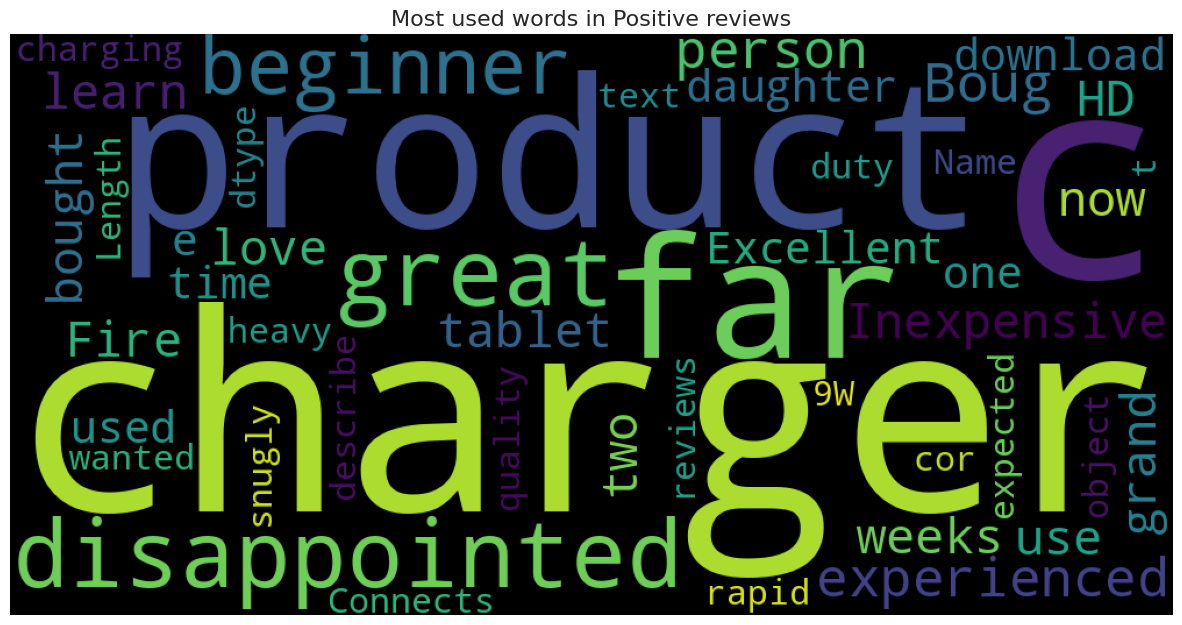

In [28]:
# Combine positive reviews into a single string
all_positive_words = pd.Series(' '.join(str(positive_reviews['reviews.text']).split()))

# Create a WordCloud object
positive_wordcloud = WordCloud(width=1000, height=500).generate(' '.join(all_positive_words))

# Set up Matplotlib for visualization
plt.figure(figsize=(15, 8))

# Display the WordCloud for positive reviews
plt.imshow(positive_wordcloud)
plt.title("Most used words in Positive reviews", size=16)
plt.axis("off")
plt.show()

removing Nan

In [29]:
from sklearn.model_selection import StratifiedShuffleSplit
print("Before {}".format(len(df)))
dataAfter = df.dropna(subset=["reviews.rating"])
# Removes all NAN in reviews.rating
print("After {}".format(len(dataAfter)))
dataAfter["reviews.rating"] = dataAfter["reviews.rating"].astype(int)

Before 34660
After 34627


In [30]:
split = StratifiedShuffleSplit(n_splits=5, test_size=0.2)
for train_index, test_index in split.split(dataAfter,
                                           dataAfter["reviews.rating"]):
    strat_train = dataAfter.reindex(train_index)
    strat_test = dataAfter.reindex(test_index)

In [31]:
len(strat_train),len(strat_test)

(27701, 6926)

In [32]:
strat_train["reviews.rating"].value_counts()/len(strat_train)

5.0    0.685174
4.0    0.247031
3.0    0.043500
2.0    0.011696
1.0    0.011588
Name: reviews.rating, dtype: float64

In [33]:
strat_test["reviews.rating"].value_counts()/len(strat_test)

5.0    0.689864
4.0    0.244730
3.0    0.042160
1.0    0.011406
2.0    0.011118
Name: reviews.rating, dtype: float64

### Data Exploration


In [34]:
reviews = strat_train.copy()
reviews.head(2)

,id,name,asins,brand,categories,keys,manufacturer,reviews.date,reviews.dateAdded,reviews.dateSeen,...,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.userCity,reviews.userProvince,reviews.username,sentiment_score,sentiment
4349,AVphgVaX1cnluZ0-DR74,"Fire Tablet, 7 Display, Wi-Fi, 8 GB - Includes...",B018Y229OU,Amazon,"Fire Tablets,Tablets,Computers & Tablets,All T...",firetablet7displaywifi8gbincludesspecialoffers...,Amazon,2015-11-28T00:00:00.000Z,2017-05-21T04:06:08Z,"2017-04-30T00:26:00.000Z,2017-06-07T08:10:00.000Z",...,5.0,5.0,http://reviews.bestbuy.com/3545/5025800/review...,we bought this for my 11 year old daughter and...,great for all ages,NaN,NaN,Mark,2.0,0.0
30776,AV1YE_muvKc47QAVgpwE,NaN,B00U3FPN4U,Amazon Fire Tv,"Back To College,College Electronics,College Tv...","848719057492,amazonfiretv/51454342,amazonfiret...",Amazon,2017-01-06T00:00:00.000Z,2017-09-20T05:35:55Z,"2017-08-25T22:21:42.763Z,2017-08-19T09:26:46.1...",...,0.0,5.0,http://reviews.bestbuy.com/3545/4370400/review...,"I have the Roku 4, and new Apple TV, this stre...",Great streaming box,NaN,NaN,Techno,2.0,0.0


In [35]:
reviews.groupby("asins")["name"].unique()

asins
B005PB2T0S               [Amazon Kindle Lighted Leather Cover,,,\r\nAma...
B005PB2T2Q               [Fire Kids Edition Tablet, 7 Display, Wi-Fi, 1...
B00IOY8XWQ               [Kindle Paperwhite,,,\r\nKindle Paperwhite,,,,...
B00IOYAM4I               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00L9EPT8O,B01E6AO69U    [Echo (White),,,\r\nEcho (White),,,, Amazon Fi...
B00LO29KXQ               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00LW9XOJM                                                           [nan]
B00OQVZDJM               [Amazon Kindle Paperwhite - eBook reader - 4 G...
B00QFQRELG                                                           [nan]
B00QJDU3KY               [Fire Tablet, 7 Display, Wi-Fi, 8 GB - Include...
B00QL1ZN3G                                                           [nan]
B00REQKWGA               [Brand New Amazon Kindle Fire 16gb 7 Ips Displ...
B00TSUGXKE                            [Echo (White),,,\r\nEcho (White),,,]
B00U3FPN4U         

In [36]:
# Lets see all the different names for this product that have 2 ASINs
different_names = reviews[reviews["asins"] ==
                          "B00L9EPT8O,B01E6AO69U"]["name"].unique()
for name in different_names:
    print(name)

Echo (White),,,
Echo (White),,,
Amazon Fire Tv,,,
Amazon Fire Tv,,,
nan
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon - Amazon Tap Portable Bluetooth and Wi-Fi Speaker - Black,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon Fire Hd 10 Tablet, Wi-Fi, 16 Gb, Special Offers - Silver Aluminum,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon 9W PowerFast Official OEM USB Charger and Power Adapter for Fire Tablets and Kindle eReaders,,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Amazon Kindle Fire 5ft USB to Micro-USB Cable (works with most Micro-USB Tablets),,,
Kindle Dx Leather Cover, Black (fits 9.7 Display, Latest and 2nd Generation Kindle Dxs),,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red,,,
Amazon Fire Hd 6 Standing Protective Case(4th Generation - 2014 Release), Cayenne Red

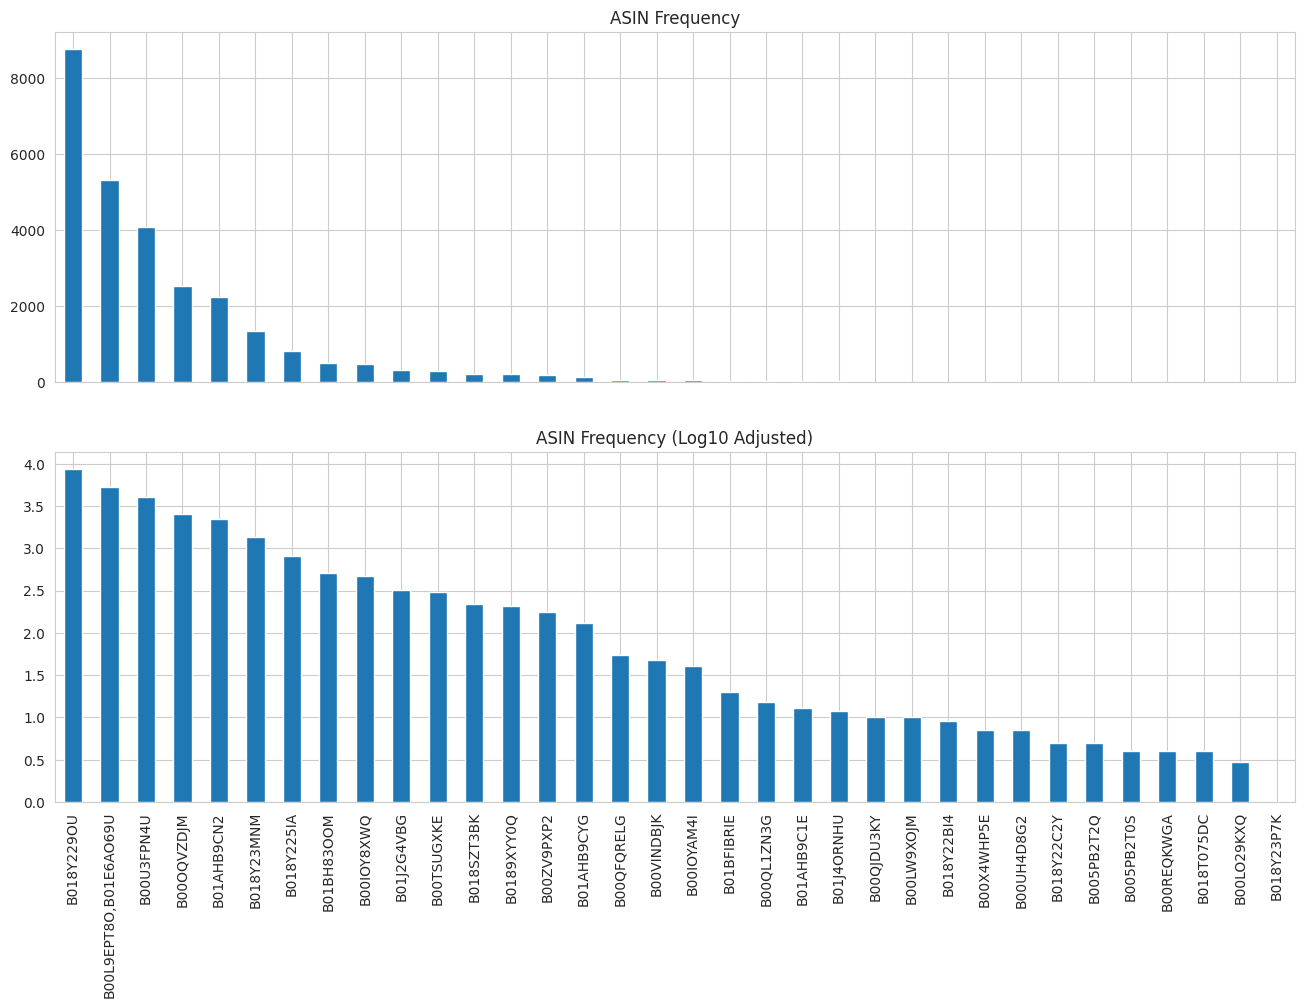

In [37]:
fig = plt.figure(figsize=(16,10))
ax1 = plt.subplot(211)
ax2 = plt.subplot(212, sharex = ax1)
reviews["asins"].value_counts().plot(kind="bar", ax=ax1, title="ASIN Frequency")
np.log10(reviews["asins"].value_counts()).plot(kind="bar", ax=ax2,
                                               title="ASIN Frequency (Log10 Adjusted)")
plt.show()

In [38]:
# Entire training dataset average rating
reviews["reviews.rating"].mean()

4.5841072525566435

### Reviews.rating / ASINs

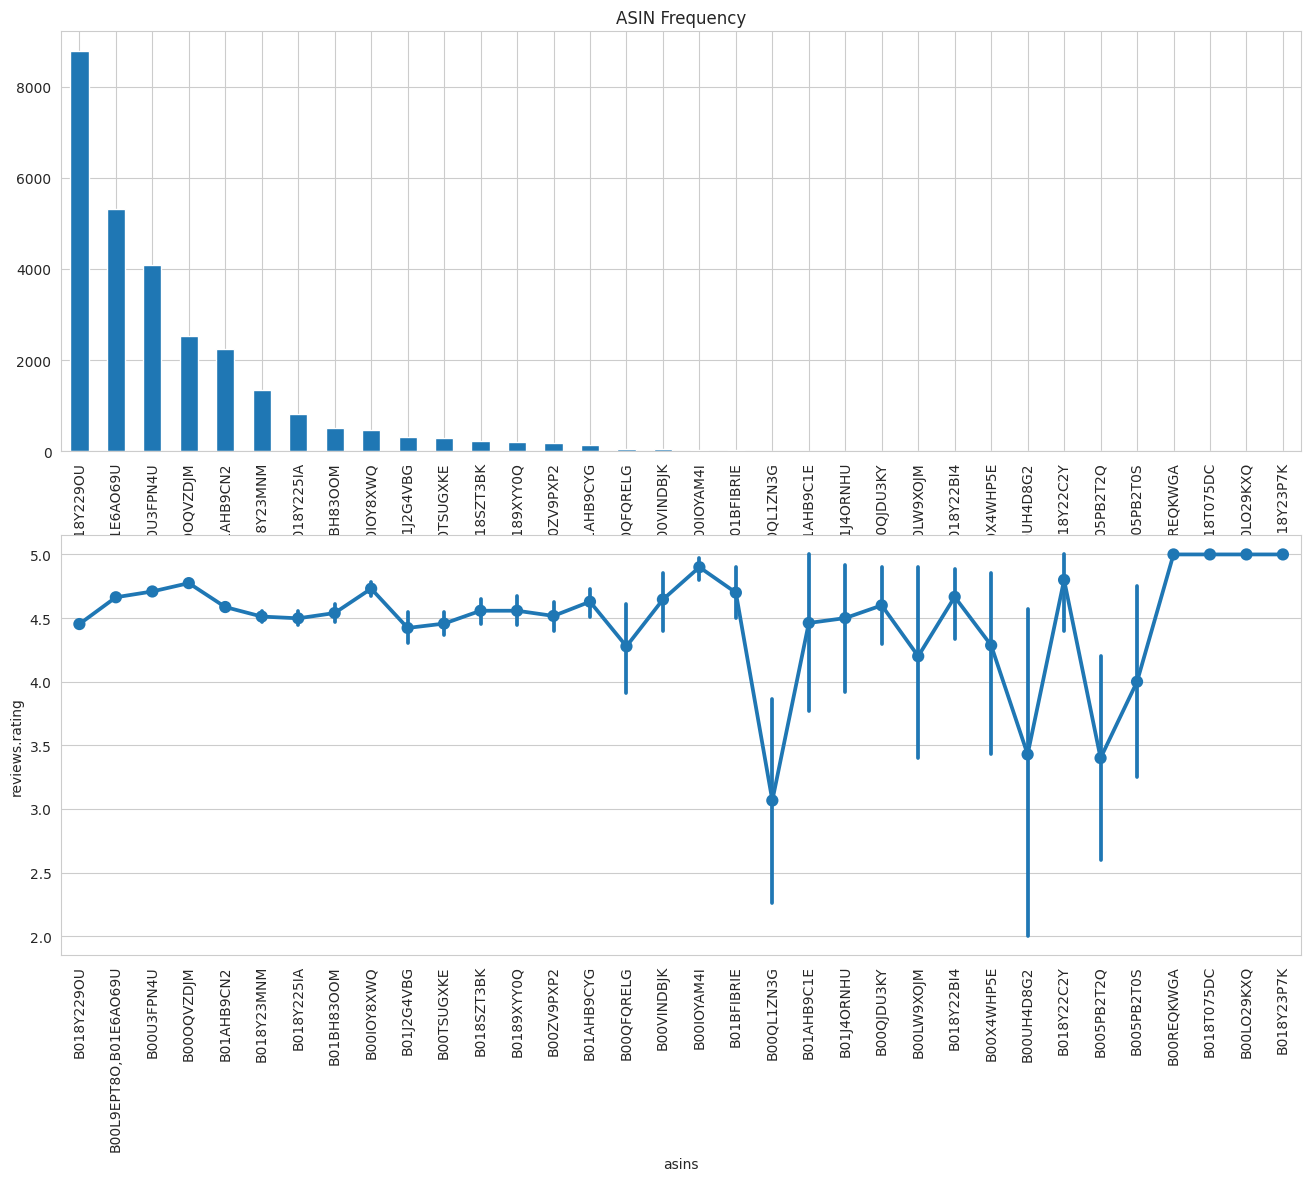

In [39]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()

### Reviews.doRecommend/ASINs

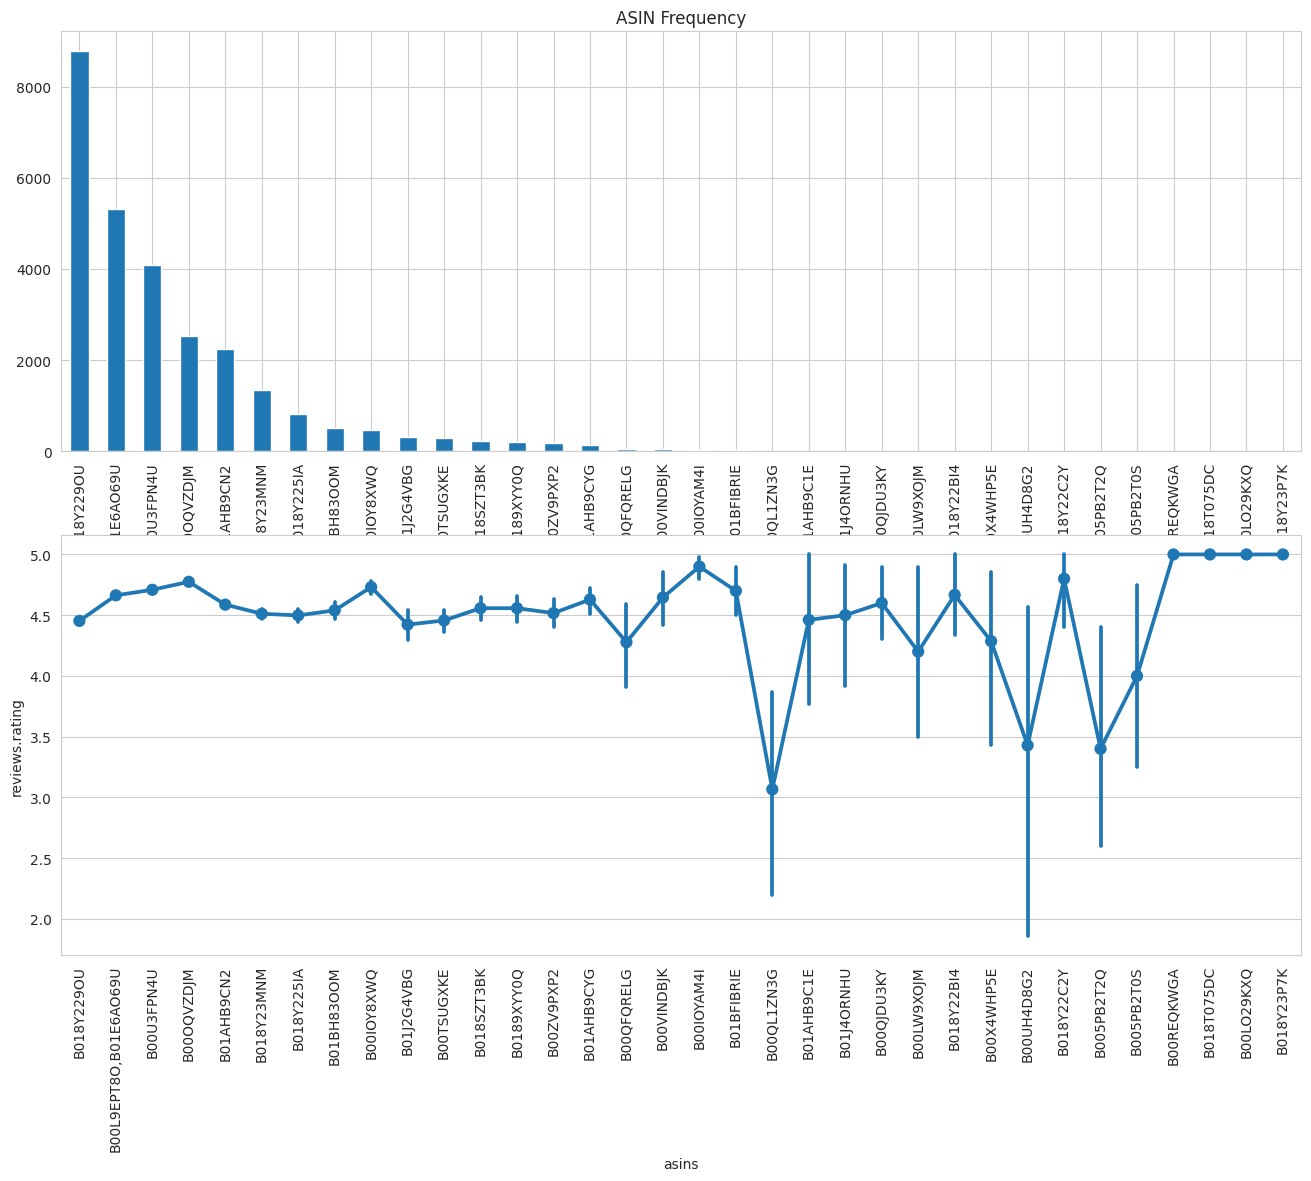

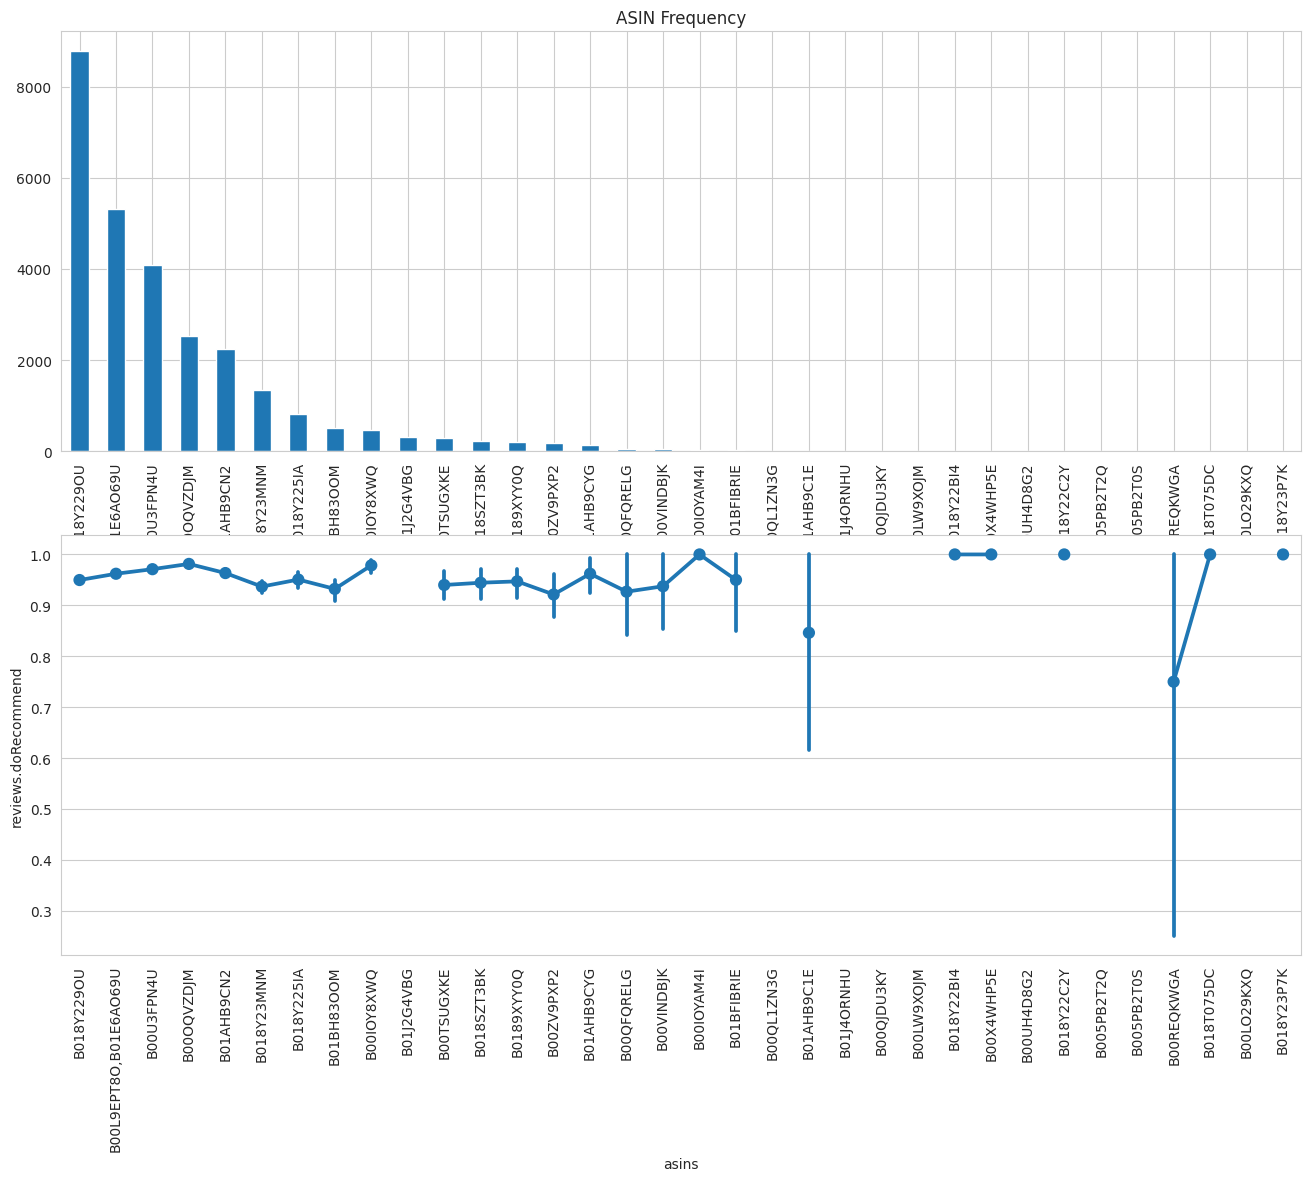

In [40]:
asins_count_ix = reviews["asins"].value_counts().index
plt.subplots(2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.rating", order=asins_count_ix, data=reviews)
plt.xticks(rotation=90)
plt.show()
plt.subplots (2,1,figsize=(16,12))
plt.subplot(2,1,1)
reviews["asins"].value_counts().plot(kind="bar", title="ASIN Frequency")
plt.subplot(2,1,2)
sns.pointplot(x="asins", y="reviews.doRecommend", order=asins_count_ix,
              data=reviews)
plt.xticks(rotation=90)
plt.show()

### Correlations

In [41]:
corr_matrix = reviews.corr()
corr_matrix
# Here we can analyze reviews.ratings with asins

,reviews.id,reviews.numHelpful,reviews.rating,reviews.userCity,reviews.userProvince,sentiment_score,sentiment
reviews.id,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.numHelpful,NaN,1.000000,-0.043720,NaN,NaN,-0.050659,NaN
reviews.rating,NaN,-0.043720,1.000000,NaN,NaN,0.807165,NaN
reviews.userCity,NaN,NaN,NaN,NaN,NaN,NaN,NaN
reviews.userProvince,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sentiment_score,NaN,-0.050659,0.807165,NaN,NaN,1.000000,NaN
sentiment,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
counts = reviews["asins"].value_counts().to_frame()
counts.head()

,asins
B018Y229OU,8772
"B00L9EPT8O,B01E6AO69U",5304
B00U3FPN4U,4076
B00OQVZDJM,2525
B01AHB9CN2,2241


In [43]:
avg_rating = reviews.groupby("asins")["reviews.rating"].mean().to_frame()
avg_rating.head()

,reviews.rating
asins,
B005PB2T0S,4.000000
B005PB2T2Q,3.400000
B00IOY8XWQ,4.731183
B00IOYAM4I,4.900000
"B00L9EPT8O,B01E6AO69U",4.663462


In [44]:
table = counts.join(avg_rating)
table.head(30)

,asins,reviews.rating
B018Y229OU,8772,4.453032
"B00L9EPT8O,B01E6AO69U",5304,4.663462
B00U3FPN4U,4076,4.709028
B00OQVZDJM,2525,4.774653
B01AHB9CN2,2241,4.586792
B018Y23MNM,1346,4.511887
B018Y225IA,811,4.498150
B01BH83OOM,504,4.539683
B00IOY8XWQ,465,4.731183
B01J2G4VBG,322,4.422360


,asins,reviews.rating
asins,1.000000,0.099791
reviews.rating,0.099791,1.000000


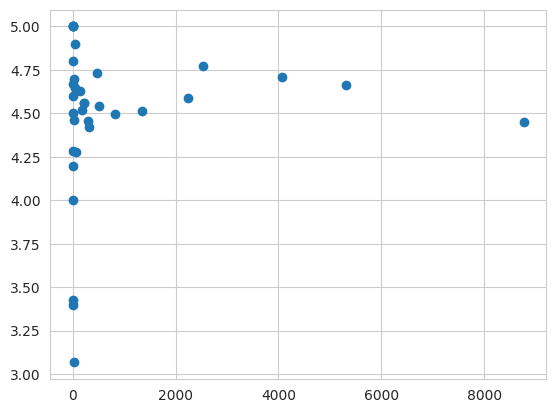

In [45]:
plt.scatter("asins", "reviews.rating", data=table)
table.corr()

### Sentiment Analysis#

In [46]:
def sentiments(rating):
    if (rating == 5) or (rating == 4):
        return "Positive"
    elif rating == 3:
        return "Neutral"
    elif (rating == 2) or (rating == 1):
        return "Negative"
# Add sentiments to the data
strat_train["Sentiment"] = strat_train["reviews.rating"].apply(sentiments)
strat_test["Sentiment"] = strat_test["reviews.rating"].apply(sentiments)
strat_train["Sentiment"][:20]

4349     Positive
30776    Positive
28775     Neutral
1136     Positive
17803    Positive
7336     Positive
32638    Positive
13995    Positive
6728     Negative
22009    Positive
11047    Positive
22754    Positive
5578     Positive
11673    Positive
19168    Positive
14903    Positive
30843    Positive
5440     Positive
28940    Positive
31258    Positive
Name: Sentiment, dtype: object

In [47]:
print(f"review text null value : {strat_train['reviews.text'].isnull().sum()}")
print(f"Sentiment null value : {strat_train['Sentiment'].isnull().sum()}")

review text null value : 28
Sentiment null value : 28


In [48]:
strat_train['Sentiment'].unique()

array(['Positive', 'Neutral', 'Negative', None], dtype=object)

In [49]:
most_common_word_Sentiment = get_common_word(strat_train, 'Sentiment')
print(most_common_word_Sentiment)

most_common_word_review = get_common_word(strat_train, 'reviews.text')
print(most_common_word_review)

positive
the


Remove stop words from text data in English

In [50]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download the stop words
nltk.download('stopwords')
nltk.download('punkt')

# Get the stop words for Arabic and English
stop_words = stopwords.words('english')

# Function to remove stop words from a string
def remove_stop_words(text):
    tokens = word_tokenize(text)
    filtered = [word for word in tokens if word.casefold() not in stop_words]
    return ' '.join(filtered)

review_without_null = strat_train[strat_train['reviews.text'].notnull()]['reviews.text']
# Apply the function to the reviews.text
strat_train['reviews.text'] = review_without_null.apply(remove_stop_words)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [51]:
strat_train['reviews.text'] = strat_train['reviews.text'].str.replace('.', '')
strat_train['reviews.text'] = strat_train['reviews.text'].str.replace(',', '')
strat_train['reviews.text'] = strat_train['reviews.text'].str.replace('!', '')

most_common_word_review = get_common_word(strat_train, 'reviews.text')
print(most_common_word_review)

great


In [52]:
strat_train['reviews.text'] = strat_train['reviews.text'].fillna(most_common_word_review)

In [53]:
strat_train['Sentiment']= strat_train['Sentiment'].fillna('Positive')

In [54]:
print(f"review text null value : {strat_train['reviews.text'].isnull().sum()}")
print(f"Sentiment null value : {strat_train['Sentiment'].isnull().sum()}")

review text null value : 0
Sentiment null value : 0


In [55]:
from sklearn.model_selection import train_test_split

# Now split the data
X = strat_train['reviews.text']
y = strat_train["Sentiment"]
y = y.astype(str)

print((X.shape, y.shape))
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

((27701,), (27701,))


In [56]:
# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.fit_transform(X_test)
X_train_counts.shape

(22160, 12410)

In [57]:
# Text preprocessing and occurance counting
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X_train)
X_test_counts = count_vect.fit_transform(X_test)
X_train_counts.shape

(22160, 12410)

In [58]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer(use_idf=False)
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)
X_test_tfidf =  tfidf_transformer.fit_transform(X_test_counts)
X_train_tfidf.shape

(22160, 12410)

## LSTM Classifier

In [59]:
import torch
import torch.nn as nn
import torch.optim as optim

In [60]:
from sklearn.preprocessing import LabelEncoder

# Encode your labels
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Encode your test labels
y_test_encoded = le.fit_transform(y_test)

In [61]:
# Assuming that your data is already preprocessed and each document is represented as a list of indices
# X_train_tfidf is your data and y_train are your labels

# Define the LSTM model
class LSTMClassifier(nn.Module):
    def __init__(self, embedding_dim, hidden_dim, output_dim):
        super(LSTMClassifier, self).__init__()
        self.hidden_dim = hidden_dim
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        out = self.fc(lstm_out[:, -1, :])
        return out

In [62]:
embedding_dim = 100  # This might depend on the size of your vocabulary or the word vectors you are using.
hidden_dim = 256     # This can be adjusted, common values are 128, 256, 512, etc.
output_dim = 1       # This is typically 1 for binary classification tasks, or equal to the number of classes for multi-class classification.
learning_rate = 0.001  # Common values are 0.1, 0.01, 0.001, etc. This should be tuned for your specific task.


In [63]:
# Create the model, loss function and optimizer
model = LSTMClassifier(embedding_dim, hidden_dim, output_dim)
loss_function = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [64]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
# Create lists to store loss and accuracy values
train_loss = []
train_acc = []

# Convert your data and labels to tensors, change datatype to float/long, and add a sequence length dimension
inputs = torch.from_numpy(X_train_tfidf.toarray()).float().unsqueeze(1)
labels = torch.tensor(y_train_encoded).long()

num_epochs=1

# Training loop
for epoch in range(num_epochs):
    # Clear the gradients
    optimizer.zero_grad()

    # Forward pass
    outputs = model(inputs)
    loss = loss_function(outputs, labels)

    # Calculate accuracy
    acc = accuracy(outputs, labels)

    # Backward pass and optimization
    loss.backward()
    optimizer.step()

    # Print loss and accuracy for each epoch
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {loss.item()}, Accuracy: {acc.item()}')

    # Append loss and accuracy for plotting
    train_loss.append(loss.item())
    train_acc.append(acc.item())


In [ ]:
import matplotlib.pyplot as plt

# Plotting loss
plt.figure(figsize=(10, 5))
plt.plot(train_loss)
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

# Plotting accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc)
plt.title('Training Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()


In [ ]:
# Convert your test data to a tensor, change datatype to float, and add a sequence length dimension
X_test_tfidf_tensor = torch.from_numpy(X_test_tfidf.toarray()).float().unsqueeze(1)

# Get the model's predictions for the test data
outputs_test = model(X_test_tfidf_tensor)
_, predicted_test = torch.max(outputs_test, 1)


In [ ]:
# Convert your test labels to a tensor and change datatype to long
y_test_encoded_tensor = torch.tensor(y_test_encoded).long()

In [ ]:
from sklearn.metrics import confusion_matrix

# Convert your test labels to a tensor and change datatype to long
y_test_encoded_tensor = torch.tensor(y_test_encoded).long()

# Create a confusion matrix
cm = confusion_matrix(y_test_encoded_tensor.numpy(), predicted_test.numpy())
print(cm)

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

print(classification_report(y_test_encoded_tensor.numpy(), predicted_test.numpy()))
lstm = accuracy_score(y_test_encoded_tensor.numpy(), predicted_test.numpy())
print('Accuracy: {}'.format(lstm) )